In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

In [2]:
data = pd.read_csv('hmnist_28_28_RGB.csv')
data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [3]:
y = data['label']#skin cancer type
x = data.drop(columns = ['label'])# pics pixels
x

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,181,208,185,187,208,186,186,206,187,189
10011,2,3,1,38,33,32,121,104,103,132,...,129,96,79,76,24,23,21,3,4,1
10012,132,118,118,167,149,149,175,156,160,184,...,190,204,181,178,181,159,153,172,151,145
10013,160,124,146,164,131,152,167,127,146,169,...,165,185,162,167,184,157,166,185,162,172


In [4]:
y

0        2
1        2
2        2
3        2
4        2
        ..
10010    0
10011    0
10012    0
10013    0
10014    6
Name: label, Length: 10015, dtype: int64

In [5]:
cancer_types = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

[[[192 153 193]
  [195 155 192]
  [197 154 185]
  ...
  [193 144 153]
  [197 154 163]
  [194 152 160]]

 [[197 162 202]
  [201 160 197]
  [202 160 193]
  ...
  [194 147 149]
  [198 158 166]
  [192 153 167]]

 [[197 155 193]
  [198 154 185]
  [202 156 191]
  ...
  [194 149 152]
  [199 161 177]
  [194 156 175]]

 ...

 [[194 157 191]
  [206 173 206]
  [206 165 192]
  ...
  [191 155 183]
  [193 159 187]
  [193 163 197]]

 [[187 154 185]
  [203 171 199]
  [202 161 183]
  ...
  [178 131 148]
  [187 152 174]
  [190 159 189]]

 [[171 136 164]
  [191 153 179]
  [196 155 176]
  ...
  [173 124 138]
  [183 147 166]
  [185 154 177]]]


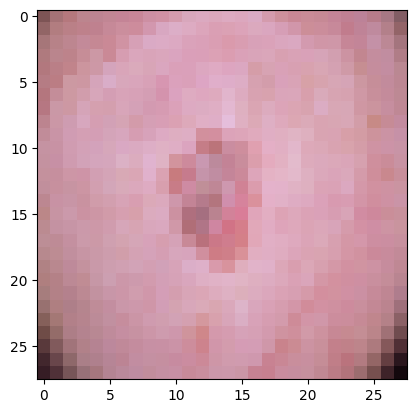

In [6]:
x = np.array(x).reshape(-1,28,28,3) #scale 28*28 pixels and in one pixel we three color rgb *3
print(x[0])
image = np.uint8(x[8])
plt.imshow(image)

[[[125  84  85]
  [165 114 118]
  [181 120 125]
  ...
  [183 124 138]
  [167 120 132]
  [130  93 100]]

 [[146 101 102]
  [178 125 128]
  [186 128 135]
  ...
  [191 138 158]
  [179 128 138]
  [147 100 104]]

 [[166 118 121]
  [183 130 136]
  [189 134 144]
  ...
  [196 145 167]
  [188 136 149]
  [164 117 126]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


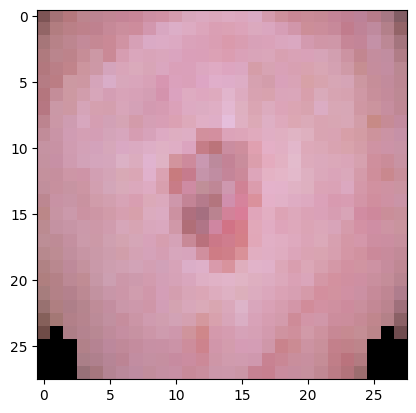

In [7]:
def remove_hair(image):
    #convert np to image
    image = np.uint8(image)
    # تبدیل تصویر ورودی به حالت سیاه و سفید با استفاده از تبدیل رنگی RGB به GRAY
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # حذف نویز تصویر با استفاده از فیلتر گاوسی
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # تشخیص لبه‌های تصویر با استفاده از الگوریتم Canny
    edges = cv2.Canny(blur, threshold1=50, threshold2=200)

    # اعمال فیلتر Morphological Closing برای ادغام لبه‌های جدا شده و حذف حفره‌ها
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # از تصویر اصلی موها را حذف کنید
    mask = closed.astype(bool)
    out = image.copy()
    out[mask] = 0

    return out
processed_images = []
for img in x:
    processed_img = remove_hair(img)
    processed_images.append(processed_img)
plt.imshow(processed_images[8])
x = np.array(processed_images)
print(x[8])

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [9]:
model = Sequential()
# اضافه کردن لایه Conv2D با 32 فیلتر، اندازه فیلتر 3x3 و تابع فعال‌سازی relu
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))

# اضافه کردن لایه MaxPooling2D با اندازه پنجره 2x2
model.add(layers.MaxPooling2D((2, 2)))

# اضافه کردن لایه Conv2D دیگر با 64 فیلتر، اندازه فیلتر 3x3 و تابع فعال‌سازی relu
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# اضافه کردن لایه MaxPooling2D دیگر با اندازه پنجره 2x2
model.add(layers.MaxPooling2D((2, 2)))

# تبدیل تصویر به بردار
model.add(layers.Flatten())

# اضافه کردن لایه Dropout با نرخ Dropout=0.5
model.add(layers.Dropout(0.5))

# اضافه کردن لایه Dense با 64 نورون و تابع فعال‌سازی relu
model.add(layers.Dense(64, activation='relu'))

# اضافه کردن لایه خروجی Dense با تابع فعال‌سازی softmax برای دسته بندی چند دسته‌ای
model.add(layers.Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [19]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    batch_size = 256,
                    epochs = 20,)

Epoch 1/20
28/28 [==============================] - 2s 32ms/step - loss: 0.4280 - accuracy: 0.8414
Epoch 2/20
28/28 [==============================] - 1s 32ms/step - loss: 0.4181 - accuracy: 0.8478
Epoch 3/20
28/28 [==============================] - 1s 32ms/step - loss: 0.4048 - accuracy: 0.8489
Epoch 4/20
28/28 [==============================] - 1s 32ms/step - loss: 0.4073 - accuracy: 0.8481
Epoch 5/20
28/28 [==============================] - 1s 33ms/step - loss: 0.3923 - accuracy: 0.8559
Epoch 6/20
28/28 [==============================] - 1s 34ms/step - loss: 0.4108 - accuracy: 0.8482
Epoch 7/20
28/28 [==============================] - 1s 34ms/step - loss: 0.4073 - accuracy: 0.8468
Epoch 8/20
28/28 [==============================] - 1s 34ms/step - loss: 0.3938 - accuracy: 0.8521
Epoch 9/20
28/28 [==============================] - 1s 34ms/step - loss: 0.3879 - accuracy: 0.8588
Epoch 10/20
28/28 [==============================] - 1s 34ms/step - loss: 0.3854 - accuracy: 0.8571
Epoch 11/

In [20]:
model.save('my_model.h5')

In [21]:
model = load_model('my_model.h5')

In [22]:
model.evaluate(X_test, Y_test)

94/94 [==============================] - 0s 3ms/step - loss: 2.0174 - accuracy: 0.6865


[2.0173890590667725, 0.6865224838256836]